In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10
X = np.linspace(-5,5,N)

K = np.ones(3)/3

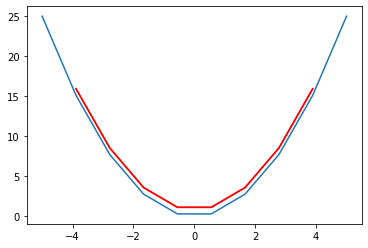

In [3]:
plt.plot(X,X**2)
plt.plot(np.convolve(X,K)[2:-2], np.convolve(X*X, K)[2:-2], 'r')
plt.plot(np.convolve(X,K)[2:-2], np.convolve(X*X, K)[2:-2], 'r')

## without clipping

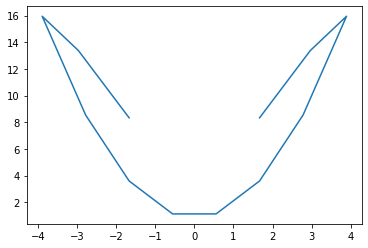

In [4]:
K = np.ones(3)/3

plt.plot(np.convolve(X,K), np.convolve(X*X, K))

In [5]:
VK = np.zeros_like(X)
VK[:3] = 1
VK

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0.])

In [154]:
## convolution is an operator 

In [6]:
MK = np.vstack([np.roll(VK, N-1 + k) for k in range(N)])
MK

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

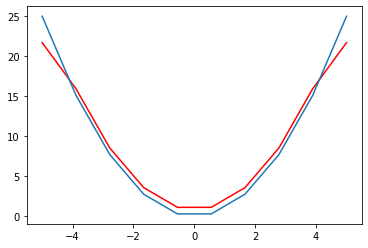

In [7]:
plt.plot( X, np.dot(MK/3, X*X),'r')
plt.plot(X, X*X);


In [8]:
mm = np.linalg.inv(MK)*3 
mm


array([[ 1.,  1., -2.,  1.,  1., -2.,  1.,  1., -2.,  1.],
       [ 1.,  1.,  1., -2.,  1.,  1., -2.,  1.,  1., -2.],
       [-2.,  1.,  1.,  1., -2.,  1.,  1., -2.,  1.,  1.],
       [ 1., -2.,  1.,  1.,  1., -2.,  1.,  1., -2.,  1.],
       [ 1.,  1., -2.,  1.,  1.,  1., -2.,  1.,  1., -2.],
       [-2.,  1.,  1., -2.,  1.,  1.,  1., -2.,  1.,  1.],
       [ 1., -2.,  1.,  1., -2.,  1.,  1.,  1., -2.,  1.],
       [ 1.,  1., -2.,  1.,  1., -2.,  1.,  1.,  1., -2.],
       [-2.,  1.,  1., -2.,  1.,  1., -2.,  1.,  1.,  1.],
       [ 1., -2.,  1.,  1., -2.,  1.,  1., -2.,  1.,  1.]])

In [9]:
mm[mm> 0 ] = 0

In [10]:
np.linalg.eigvals(MK/3)

array([-0.33333333, -0.20601133,  0.127322  ,  0.53934466,  1.        ,
        0.872678  ,  0.872678  ,  0.53934466, -0.20601133,  0.127322  ])

# Exo

what happens when ```N % 3 = 0```

---

# The edge detection kernel

pour faire simple on va etudier le cas de dimension 1
le noyau est

```np.array([-1,2,-1])```

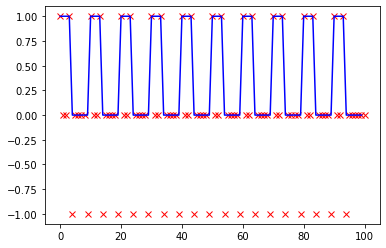

In [11]:
def f(x):
    return x % 10 in [0,1,2,3]

K = np.array([-1,2,-1])

X = np.arange(100).astype(int)
Y = np.zeros_like(X)
Y[[f(k) for k in X  ]] = 1


YK = np.convolve(Y, K)[1:]
plt.plot(np.arange(len(YK)), YK,'rx' )
plt.plot(np.arange(len(Y)), Y, 'b');


In [12]:
VK = np.zeros_like(X)
VK[:3] = K
N = len(X)
MK = np.vstack([np.roll(VK,  k) for k in range(N)])
MK

array([[-1,  2, -1, ...,  0,  0,  0],
       [ 0, -1,  2, ...,  0,  0,  0],
       [ 0,  0, -1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -1,  2, -1],
       [-1,  0,  0, ...,  0, -1,  2],
       [ 2, -1,  0, ...,  0,  0, -1]])

## not invertble

In [13]:
np.linalg.det(MK)

-1.1147087742196192e-13

In [14]:
np.linalg.det(MK.astype(int))

-1.1147087742196192e-13

In [15]:
from scipy.linalg import null_space

ker = null_space(MK)
ker.shape

(100, 1)

In [16]:
ker[:,0]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [144]:
! ../.g

[master 75cbae9] web
 3 files changed, 457 insertions(+), 9 deletions(-)
 create mode 100644 PROG/.ipynb_checkpoints/conv_kernels-checkpoint.ipynb
 create mode 100644 PROG/conv_kernels.ipynb
Counting objects: 6, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 52.01 KiB | 3.47 MiB/s, done.
Total 6 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   0280973..75cbae9  master -> master


# Regression, gradient descent

In [46]:
X = np.arange(20)
Y = 2*X + (2*np.random.random(20) -1)

In [47]:
Y

array([-0.07453839,  2.97745732,  3.93761183,  6.90028099,  8.03906948,
       10.39829643, 11.33957016, 14.87811134, 15.54017258, 18.1163826 ,
       19.75332498, 22.97723158, 24.45371675, 25.00137742, 28.77965897,
       30.37347255, 32.63636943, 33.43850855, 36.31195953, 37.0912346 ])

In [20]:
from scipy import stats

In [21]:
S = stats.linregress(X,Y)

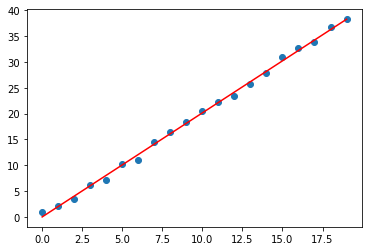

In [22]:
plt.scatter(X,Y);
plt.plot(X[[0,-1]], S.slope*X[[0,-1]] + S.intercept,'r');

In [23]:
 S.slope*X[[0,-1]] + S.intercept

array([-2.20639308e-03,  3.82972460e+01])

In [24]:
S.slope, S.intercept

(2.0157606534003203, -0.0022063930751023975)

In [25]:
A = np.linspace(0,4,10)
B = np.linspace(-4,4, 10)

M = [(a,b) for a in A
           for b in B]

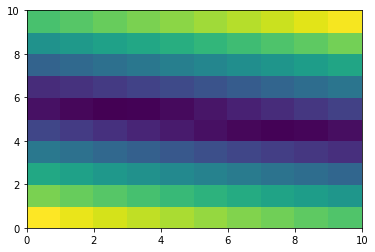

In [29]:
M = [ np.linalg.norm((a*X + b) - Y) for a in A
                                  for b in B]
plt.pcolor(np.array(M).reshape(10,10));


In [ ]:
import plotly.graph_objects as go

/tmp/ipykernel_29853/642605411.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


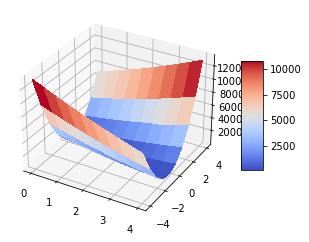

In [31]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
a, b = np.meshgrid(A,B)

# Plot the surface.
surf = ax.plot_surface(a, b , 
                       np.array(M).reshape(10,10)**2, 
                       cmap=cm.coolwarm,
                       linewidth=0, 
                       antialiased=False)


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [28]:
np.array(M).reshape(10,10)

array([[115.86244253, 112.32490877, 108.81759789, 105.34352866,
        101.90610084,  98.50915025,  95.15701192,  91.85459209,
         88.60745002,  85.42188975],
       [ 93.86750983,  90.29957032,  86.76704638,  83.27444514,
         79.82700688,  76.43084312,  73.09310139,  69.82216052,
         66.62785954,  63.5217614 ],
       [ 71.92993593,  68.31502133,  64.74236275,  61.21935859,
         57.7550962 ,  54.36080708,  51.05045047,  47.84145252,
         44.75562091,  41.82022914],
       [ 50.12508788,  46.42924022,  42.7835155 ,  39.20190031,
         35.70369331,  32.31599266,  29.07744806,  26.04376179,
         23.29510697,  20.94400696],
       [ 28.75648893,  24.90399616,  21.09709299,  17.3657876 ,
         13.77166523,  10.45714521,   7.78780758,   6.59946559,
          7.61976926,  10.20655472],
       [ 10.8235551 ,   7.78114203,   5.96220898,   6.49266038,
          8.9647242 ,  12.25491165,  15.86204202,  19.61200737,
         23.43634416,  27.30381951],
       [ 1

---


The problem is to find the best **fit**
ie : $a, b \in \mathbb{R}$ which minimise
$ \| a \vec{x} +  b  - \vec{y} \| $.

If $ \|. \| $ is $ \| x \|_2 = \sqrt{ \sum x_i^2} $ then 
$ Q(a,b) = \| a \vec{x} +  b  - \vec{y} \|^2 $

is a quadratic form.




In [50]:
vs = [[1,0],[-1,0],[0,1],[0,-1]]
vs = np.array(vs)

pt = np.array([1,1])
delta = .01

vs = delta * vs

for _ in range(1000):
    val, pt = min([ (np.linalg.norm((rr[0]*X + rr[1]) - Y), rr) for rr in pt + vs ])
pt

array([1.96, 0.52])

In [45]:
pt

array([1.94, 0.94])